In [3]:
#!pip install ultralytics

In [4]:
#! pip install pytesseract

In [ ]:
!pip uninstall torch torchvision


In [6]:
# Импорт 
import ultralytics
import PIL
from PIL import ImageDraw
from ultralytics import YOLO
import cv2
import os
import re
import sys
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt
from transformers import AutoModelForSeq2SeqLM, T5TokenizerFast
import easyocr



In [7]:
DIR='D:/HAK/Main/Data/test/images'
IMG_DIR = os.listdir(DIR)
fileName = "292"

In [8]:
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,3)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((3,3),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 50, 230)

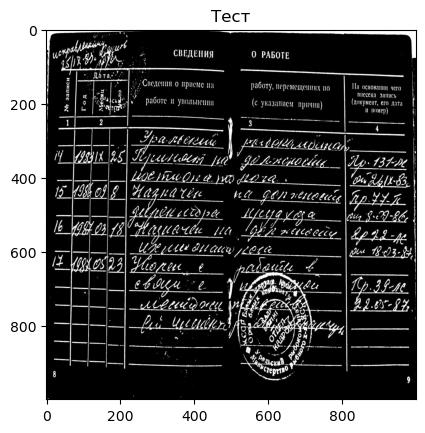

In [9]:
image = cv2.imread(DIR+'/'+IMG_DIR[0])
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('Тест')
plt.show()

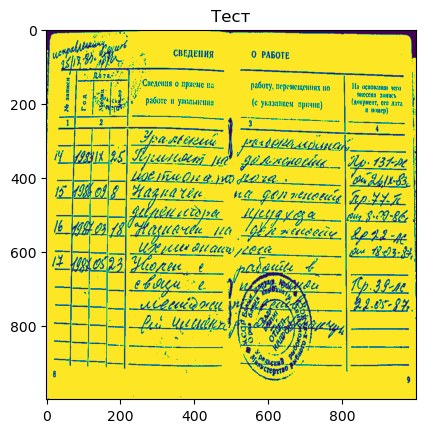

In [10]:
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(opening)
images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

PO2 = cv2.bitwise_not(gray)
th = thresholding(PO2)
cv2.imwrite(fileName + "Obr.jpg", th)

plt.imshow(th)
plt.title('Тест')
plt.show()

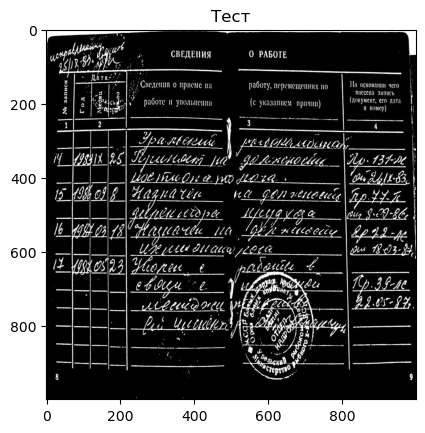

In [11]:
def align_image(image_path):
    # Загрузка изображения
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    # Обнаружение линий с помощью преобразования Хафа
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

    if lines is not None:
        # Вычисление угла наклона линий
        angles = []
        for line in lines:
            x1, y1, x2, y2 = line[0]
            angle = np.arctan2(y2 - y1, x2 - x1) * (180 / np.pi)
            angles.append(angle)

        # Вычисление медианного угла для выравнивания
        median_angle = np.median(angles)
        # Поворот изображения
        (h, w) = image.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, median_angle, 1.0)
        aligned = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

        # Сохранение выровненного изображения
        return aligned
    else:
        print("Линии для выравнивания не обнаружены.")

# Вызов функции с путем к вашему изображению
image_path = DIR+'/'+IMG_DIR[0]
immm=align_image(image_path)
plt.imshow(immm)
plt.title('Тест')
plt.show()

In [12]:
#Загрузка предо обученной сети YOLO на данных датасета 
test_model = YOLO('D:\HAK\Main/best.pt')

In [15]:
results = test_model.predict(source = immm, save = True, imgsz = 640, conf = 0.5, show_conf = False)

NotImplementedError: Could not run 'torchvision::nms' with arguments from the 'CUDA' backend. This could be because the operator doesn't exist for this backend, or was omitted during the selective/custom build process (if using custom build). If you are a Facebook employee using PyTorch on mobile, please visit https://fburl.com/ptmfixes for possible resolutions. 'torchvision::nms' is only available for these backends: [CPU, Meta, QuantizedCPU, BackendSelect, Python, FuncTorchDynamicLayerBackMode, Functionalize, Named, Conjugate, Negative, ZeroTensor, ADInplaceOrView, AutogradOther, AutogradCPU, AutogradCUDA, AutogradXLA, AutogradMPS, AutogradXPU, AutogradHPU, AutogradLazy, AutogradMeta, Tracer, AutocastCPU, AutocastCUDA, FuncTorchBatched, BatchedNestedTensor, FuncTorchVmapMode, Batched, VmapMode, FuncTorchGradWrapper, PythonTLSSnapshot, FuncTorchDynamicLayerFrontMode, PreDispatch, PythonDispatcher].

CPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\cpu\nms_kernel.cpp:112 [kernel]
Meta: registered at /dev/null:467 [kernel]
QuantizedCPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\quantized\cpu\qnms_kernel.cpp:124 [kernel]
BackendSelect: fallthrough registered at ..\aten\src\ATen\core\BackendSelectFallbackKernel.cpp:3 [backend fallback]
Python: registered at ..\aten\src\ATen\core\PythonFallbackKernel.cpp:154 [backend fallback]
FuncTorchDynamicLayerBackMode: registered at ..\aten\src\ATen\functorch\DynamicLayer.cpp:497 [backend fallback]
Functionalize: registered at ..\aten\src\ATen\FunctionalizeFallbackKernel.cpp:324 [backend fallback]
Named: registered at ..\aten\src\ATen\core\NamedRegistrations.cpp:7 [backend fallback]
Conjugate: registered at ..\aten\src\ATen\ConjugateFallback.cpp:17 [backend fallback]
Negative: registered at ..\aten\src\ATen\native\NegateFallback.cpp:18 [backend fallback]
ZeroTensor: registered at ..\aten\src\ATen\ZeroTensorFallback.cpp:86 [backend fallback]
ADInplaceOrView: fallthrough registered at ..\aten\src\ATen\core\VariableFallbackKernel.cpp:86 [backend fallback]
AutogradOther: registered at ..\aten\src\ATen\core\VariableFallbackKernel.cpp:53 [backend fallback]
AutogradCPU: registered at ..\aten\src\ATen\core\VariableFallbackKernel.cpp:57 [backend fallback]
AutogradCUDA: registered at ..\aten\src\ATen\core\VariableFallbackKernel.cpp:65 [backend fallback]
AutogradXLA: registered at ..\aten\src\ATen\core\VariableFallbackKernel.cpp:69 [backend fallback]
AutogradMPS: registered at ..\aten\src\ATen\core\VariableFallbackKernel.cpp:77 [backend fallback]
AutogradXPU: registered at ..\aten\src\ATen\core\VariableFallbackKernel.cpp:61 [backend fallback]
AutogradHPU: registered at ..\aten\src\ATen\core\VariableFallbackKernel.cpp:90 [backend fallback]
AutogradLazy: registered at ..\aten\src\ATen\core\VariableFallbackKernel.cpp:73 [backend fallback]
AutogradMeta: registered at ..\aten\src\ATen\core\VariableFallbackKernel.cpp:81 [backend fallback]
Tracer: registered at ..\torch\csrc\autograd\TraceTypeManual.cpp:297 [backend fallback]
AutocastCPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\autocast\nms_kernel.cpp:34 [kernel]
AutocastCUDA: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\autocast\nms_kernel.cpp:27 [kernel]
FuncTorchBatched: registered at ..\aten\src\ATen\functorch\LegacyBatchingRegistrations.cpp:731 [backend fallback]
BatchedNestedTensor: registered at ..\aten\src\ATen\functorch\LegacyBatchingRegistrations.cpp:758 [backend fallback]
FuncTorchVmapMode: fallthrough registered at ..\aten\src\ATen\functorch\VmapModeRegistrations.cpp:27 [backend fallback]
Batched: registered at ..\aten\src\ATen\LegacyBatchingRegistrations.cpp:1075 [backend fallback]
VmapMode: fallthrough registered at ..\aten\src\ATen\VmapModeRegistrations.cpp:33 [backend fallback]
FuncTorchGradWrapper: registered at ..\aten\src\ATen\functorch\TensorWrapper.cpp:202 [backend fallback]
PythonTLSSnapshot: registered at ..\aten\src\ATen\core\PythonFallbackKernel.cpp:162 [backend fallback]
FuncTorchDynamicLayerFrontMode: registered at ..\aten\src\ATen\functorch\DynamicLayer.cpp:493 [backend fallback]
PreDispatch: registered at ..\aten\src\ATen\core\PythonFallbackKernel.cpp:166 [backend fallback]
PythonDispatcher: registered at ..\aten\src\ATen\core\PythonFallbackKernel.cpp:158 [backend fallback]


In [ ]:

#Получение массива координат всех боксов обнаруженных предиктом
arr = []

for r in results:
    boxes = r.boxes
    for box in boxes:
        b = box.xyxy.tolist()[0]
        arr.append(b)
        
sorted_list = sorted(arr, key=lambda x: (x[1], x[0]))

In [ ]:
i = 0
for b in sorted_list:
    x1, y1, x2, y2 = b[0], b[1], b[2], b[3]
    cropped = image[round(y1):round(y2), round(x1):round(x2)]
    cv2.imwrite(f"D:/HAK/Main/predict_data/banc{i}.png", cropped)
    i += 1
    print(i)
    plt.imshow(cropped)
    plt.show()
    print(b)

In [ ]:
#!pip install transformers

In [ ]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

In [ ]:
reader = easyocr.Reader(['ru'])
for i in os.listdir("D:/HAK/Main/predict_data/"):
    im = PIL.Image.open("D:/HAK/Main/predict_data/"+i)
    bounds = reader.readtext('D:/HAK/Main/predict_data/'+i)
    draw_boxes(im,bounds)
    s = f'fileName: {i}\n, FindeText: {bounds[4]}\n, confidence level:  {bounds[5]}\n'
    print(s)
    with open(f"D:\HAK\Main/FinlOUT/{i}.txt", "w") as file:
        file.write(s)
    

In [ ]:
MODEL_NAME = 'UrukHan/t5-russian-spell'
MAX_INPUT = 256
tokenizer = T5TokenizerFast.from_pretrained(MODEL_NAME)
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME)

In [ ]:
input_sequences = ['сеглдыя хорош ден', 'когд а вы прдет к нам в госи']

## Токенизирование данных
task_prefix = "Spell correct: "
if type(input_sequences) != list: input_sequences = [input_sequences]
encoded = tokenizer(
  [task_prefix + sequence for sequence in input_sequences],
  padding="longest",
  max_length=MAX_INPUT,
  truncation=True,
  return_tensors="pt",
)